In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.regularizers import l1

In [2]:
wdf = pd.read_csv("wellington_data.csv") #read origin file
print(wdf.columns)

Index(['Date', 'Daily Average NO2 (ug/m3)', 'Daily Average O3 (ug/m3)',
       'Daily Average CO (mg/m3)', 'Daily Average PM2.5 (ug/m3)',
       'Daily Average PM10 (ug/m3)', 'WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)',
       'GustSpd(m/s)', 'WindRun(Km)', 'Rain(mm)', 'Tdry(C)', 'TWet(C)',
       'RH(%)', 'Tmax(C)', 'Tmin(C)', 'Tgmin(C)', 'ET05(C)', 'ET10(C)',
       'ET20(C)', 'ET30(C)', 'ET100(C)', 'Pmsl(hPa)', 'Pstn(hPa)', 'Sun(Hrs)',
       'Rad(MJ/m2)', 'lightCount', 'heavyCount'],
      dtype='object')


In [3]:
print(wdf)

            Date  Daily Average NO2 (ug/m3)  Daily Average O3 (ug/m3)  \
0     2020-01-01                      5.891                 14.330667   
1     2020-01-02                      3.420                 16.340000   
2     2020-01-03                      2.755                 21.569625   
3     2020-01-04                      8.181                 16.547500   
4     2020-01-05                      3.747                 14.739042   
...          ...                        ...                       ...   
1456  2023-12-27                      0.839                 13.433750   
1457  2023-12-28                      1.354                 13.960708   
1458  2023-12-29                      5.558                 15.247458   
1459  2023-12-30                      2.535                 25.080958   
1460  2023-12-31                      0.358                 20.687583   

      Daily Average CO (mg/m3)  Daily Average PM2.5 (ug/m3)  \
0                        0.100                        7.025 

In [4]:
# remove unamed columns
wdf = wdf.drop(['ET05(C)', 'ET30(C)'], axis=1)
print(wdf.columns)

Index(['Date', 'Daily Average NO2 (ug/m3)', 'Daily Average O3 (ug/m3)',
       'Daily Average CO (mg/m3)', 'Daily Average PM2.5 (ug/m3)',
       'Daily Average PM10 (ug/m3)', 'WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)',
       'GustSpd(m/s)', 'WindRun(Km)', 'Rain(mm)', 'Tdry(C)', 'TWet(C)',
       'RH(%)', 'Tmax(C)', 'Tmin(C)', 'Tgmin(C)', 'ET10(C)', 'ET20(C)',
       'ET100(C)', 'Pmsl(hPa)', 'Pstn(hPa)', 'Sun(Hrs)', 'Rad(MJ/m2)',
       'lightCount', 'heavyCount'],
      dtype='object')


In [5]:

print(wdf)

            Date  Daily Average NO2 (ug/m3)  Daily Average O3 (ug/m3)  \
0     2020-01-01                      5.891                 14.330667   
1     2020-01-02                      3.420                 16.340000   
2     2020-01-03                      2.755                 21.569625   
3     2020-01-04                      8.181                 16.547500   
4     2020-01-05                      3.747                 14.739042   
...          ...                        ...                       ...   
1456  2023-12-27                      0.839                 13.433750   
1457  2023-12-28                      1.354                 13.960708   
1458  2023-12-29                      5.558                 15.247458   
1459  2023-12-30                      2.535                 25.080958   
1460  2023-12-31                      0.358                 20.687583   

      Daily Average CO (mg/m3)  Daily Average PM2.5 (ug/m3)  \
0                        0.100                        7.025 

C:\Users\morga\AppData\Local\Temp\ipykernel_19040\3308776022.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = wdf.corr()


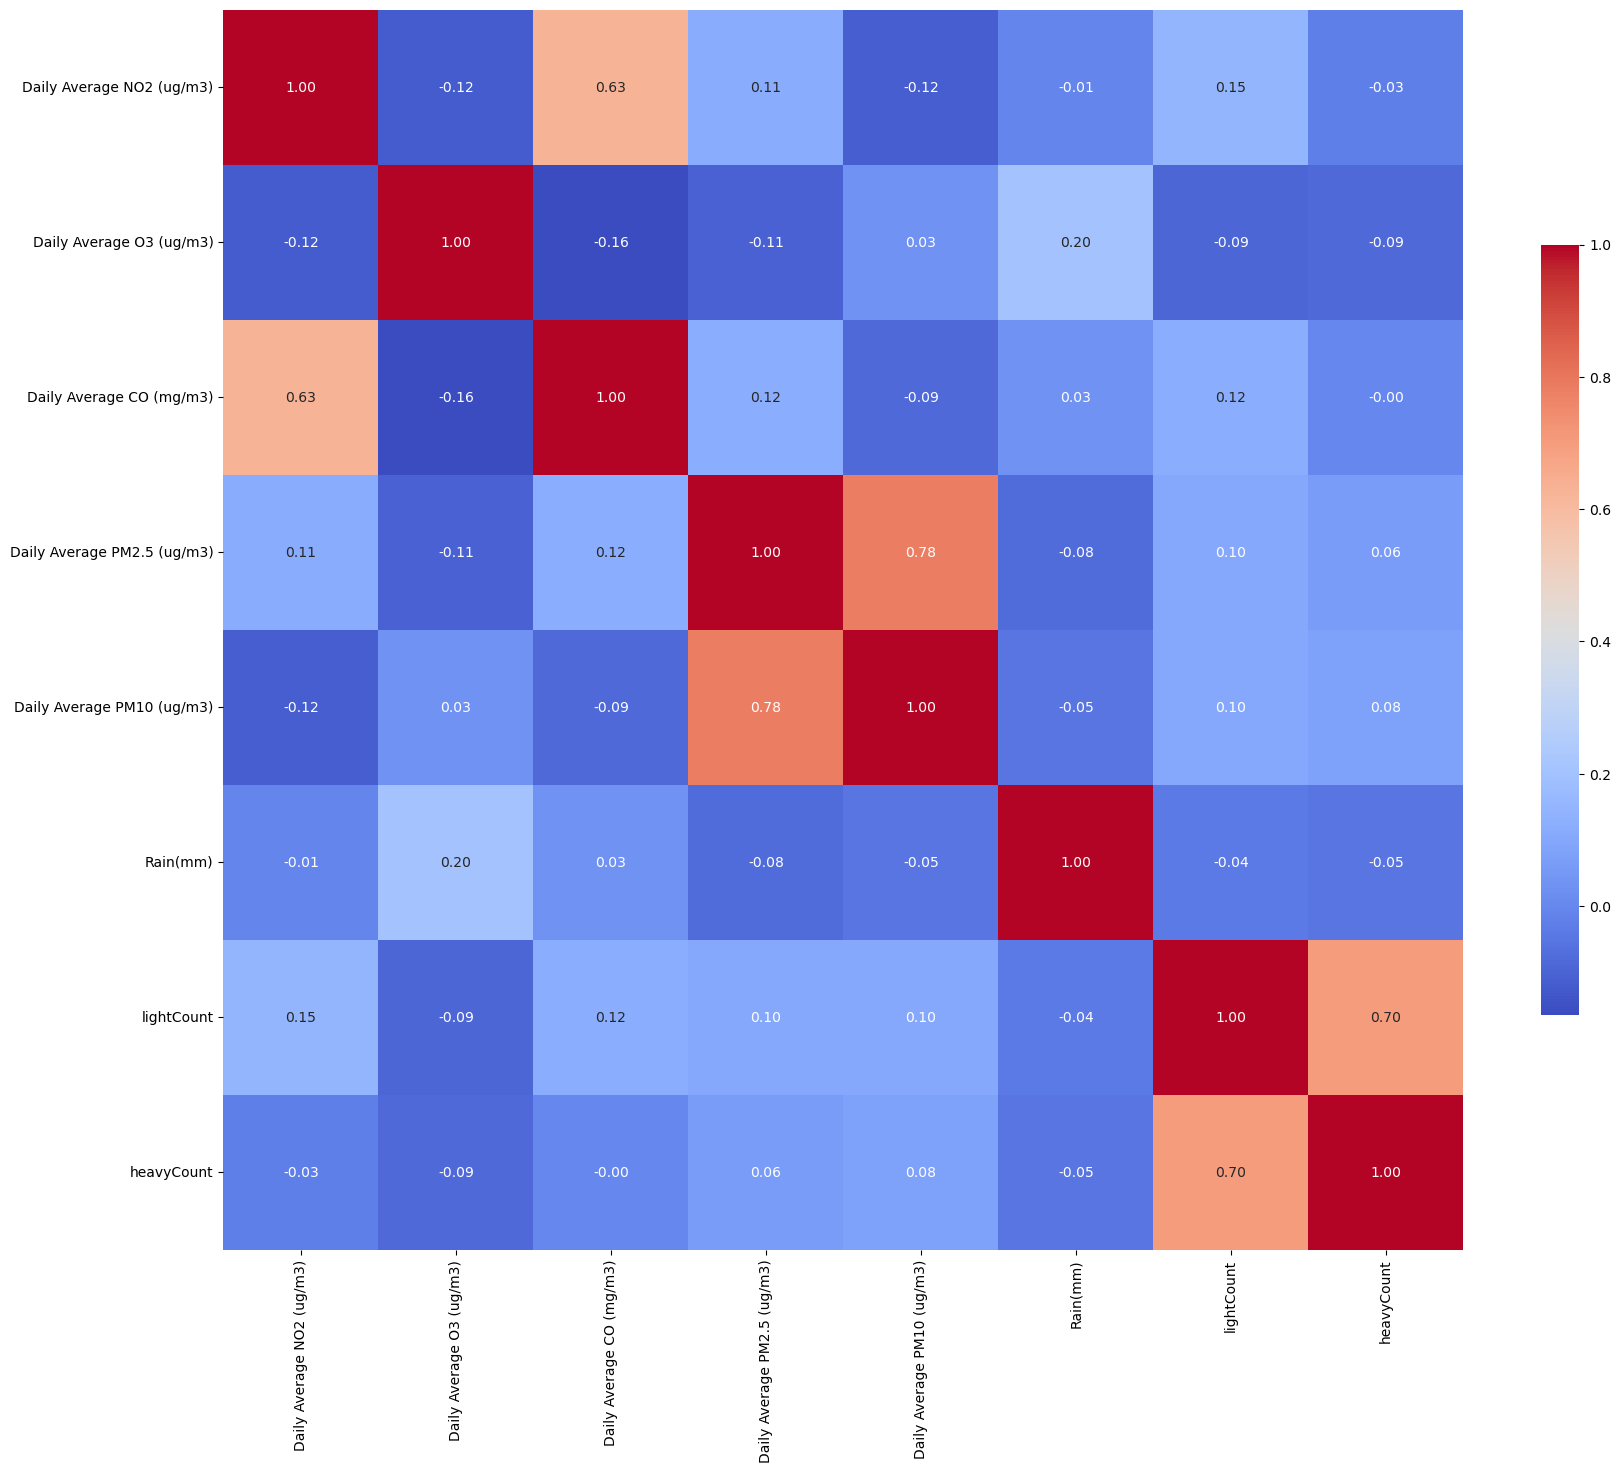

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = wdf.corr()

plt.figure(figsize=(20, 20))


sns.heatmap(corr, annot=True, fmt=".2f", square=True, cmap='coolwarm', cbar_kws={"shrink": .5})

plt.show()


In [7]:
wdf['Date'] = pd.to_datetime(wdf['Date'], format='%Y/%m/%d')

In [8]:

for col in wdf.columns:

    median = pd.to_numeric(wdf[col], errors='coerce').median()

    wdf[col] = pd.to_numeric(wdf[col], errors='coerce').fillna(median)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.regularizers import l1

wdf['Date'] = pd.to_datetime(wdf['Date'], format='%Y/%m/%d')
wdf['Date'] = wdf['Date'].apply(lambda x: x.value) 

features = wdf.drop(columns=['Daily Average PM2.5 (ug/m3)', 'Daily Average PM10 (ug/m3)'])
target = wdf[['Daily Average PM2.5 (ug/m3)', 'Daily Average PM10 (ug/m3)']]


input_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = input_scaler.fit_transform(features)


output_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = output_scaler.fit_transform(target)
                              

import joblib
joblib.dump(input_scaler, 'wellington_input_scaler2.pkl')
joblib.dump(output_scaler, 'wellington_output_scaler2.pkl')
                              
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))




In [10]:
from tensorflow.keras.layers import Dropout, MaxPooling1D


model = Sequential()


model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))


model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))


model.add(LSTM(100, activation='relu', return_sequences=False))
model.add(Dropout(0.2))


model.add(Dense(2))

model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)




Epoch 1/100

37/37 - 4s - loss: 0.0388 - val_loss: 0.0160 - 4s/epoch - 109ms/step
Epoch 2/100
37/37 - 1s - loss: 0.0148 - val_loss: 0.0130 - 755ms/epoch - 20ms/step
Epoch 3/100
37/37 - 1s - loss: 0.0136 - val_loss: 0.0140 - 726ms/epoch - 20ms/step
Epoch 4/100
37/37 - 1s - loss: 0.0132 - val_loss: 0.0125 - 728ms/epoch - 20ms/step
Epoch 5/100
37/37 - 1s - loss: 0.0132 - val_loss: 0.0145 - 726ms/epoch - 20ms/step
Epoch 6/100
37/37 - 1s - loss: 0.0129 - val_loss: 0.0124 - 738ms/epoch - 20ms/step
Epoch 7/100
37/37 - 1s - loss: 0.0119 - val_loss: 0.0139 - 759ms/epoch - 21ms/step
Epoch 8/100
37/37 - 1s - loss: 0.0114 - val_loss: 0.0124 - 734ms/epoch - 20ms/step
Epoch 9/100
37/37 - 1s - loss: 0.0114 - val_loss: 0.0122 - 741ms/epoch - 20ms/step
Epoch 10/100
37/37 - 1s - loss: 0.0115 - val_loss: 0.0117 - 638ms/epoch - 17ms/step
Epoch 11/100
37/37 - 1s - loss: 0.0114 - val_loss: 0.0114 - 532ms/epoch - 14ms/step
Epoch 12/100
37/37 - 1s - loss: 0.0115 - val_loss: 0.0121 - 675ms/epoch - 18ms/step

37/37 - 1s - loss: 0.0081 - val_loss: 0.0106 - 634ms/epoch - 17ms/step
Epoch 91/100
37/37 - 1s - loss: 0.0088 - val_loss: 0.0108 - 637ms/epoch - 17ms/step
Epoch 92/100
37/37 - 1s - loss: 0.0086 - val_loss: 0.0104 - 575ms/epoch - 16ms/step
Epoch 93/100
37/37 - 1s - loss: 0.0084 - val_loss: 0.0104 - 628ms/epoch - 17ms/step
Epoch 94/100
37/37 - 1s - loss: 0.0084 - val_loss: 0.0110 - 659ms/epoch - 18ms/step
Epoch 95/100
37/37 - 0s - loss: 0.0085 - val_loss: 0.0112 - 467ms/epoch - 13ms/step
Epoch 96/100
37/37 - 0s - loss: 0.0083 - val_loss: 0.0105 - 479ms/epoch - 13ms/step
Epoch 97/100
37/37 - 1s - loss: 0.0081 - val_loss: 0.0107 - 759ms/epoch - 21ms/step
Epoch 98/100
37/37 - 1s - loss: 0.0084 - val_loss: 0.0104 - 779ms/epoch - 21ms/step
Epoch 99/100
37/37 - 1s - loss: 0.0083 - val_loss: 0.0106 - 765ms/epoch - 21ms/step
Epoch 100/100
37/37 - 1s - loss: 0.0082 - val_loss: 0.0103 - 724ms/epoch - 20ms/step


In [11]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')

Test Loss: 0.01029268465936184


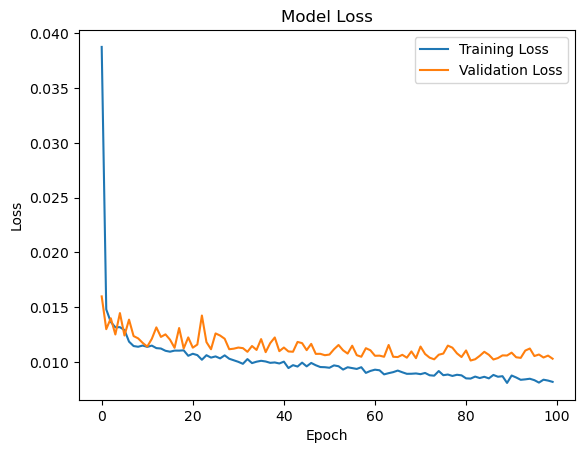

In [12]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

10/10 [==============================] - 0s 7ms/step


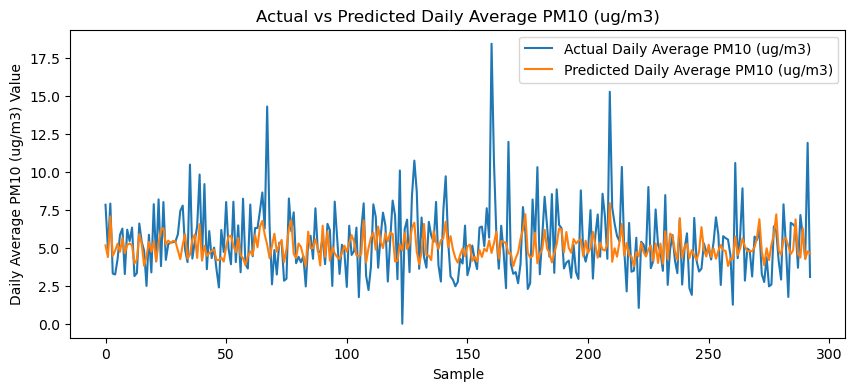

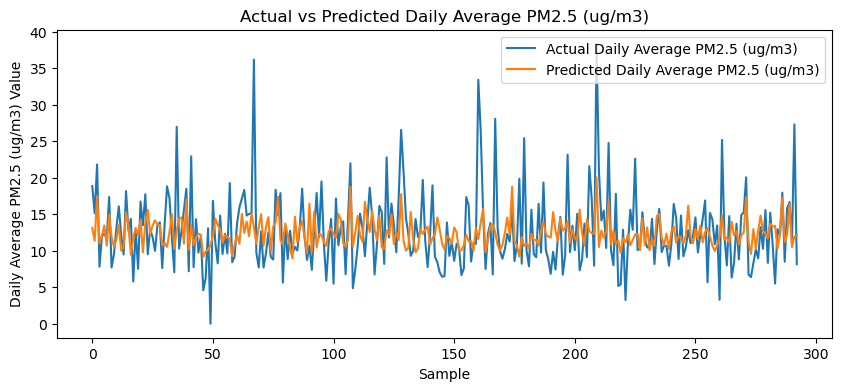

In [13]:

predictions = model.predict(X_test)


predictions_inversed = output_scaler.inverse_transform(predictions)
y_test_inversed = output_scaler.inverse_transform(y_test)


target_labels = ['Daily Average PM10 (ug/m3)', 'Daily Average PM2.5 (ug/m3)', 'Daily Average AQI']
for i in range(2):
    plt.figure(figsize=(10, 4))
    plt.plot(y_test_inversed[:, i], label=f'Actual {target_labels[i]}')
    plt.plot(predictions_inversed[:, i], label=f'Predicted {target_labels[i]}')
    plt.title(f'Actual vs Predicted {target_labels[i]}')
    plt.ylabel(f'{target_labels[i]} Value')
    plt.xlabel('Sample')
    plt.legend()
    plt.show()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 11, 64)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 128)            24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 4, 128)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 128)            0

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def analyze_rnn_model(model, X_train, y_train, X_test, y_test):

    model.summary()

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Train R2 Score: {train_r2}")
    print(f"Test R2 Score: {test_r2}")


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Train Set')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Test Set')
    plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 11, 64)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 128)            24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 4, 128)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 128)            0

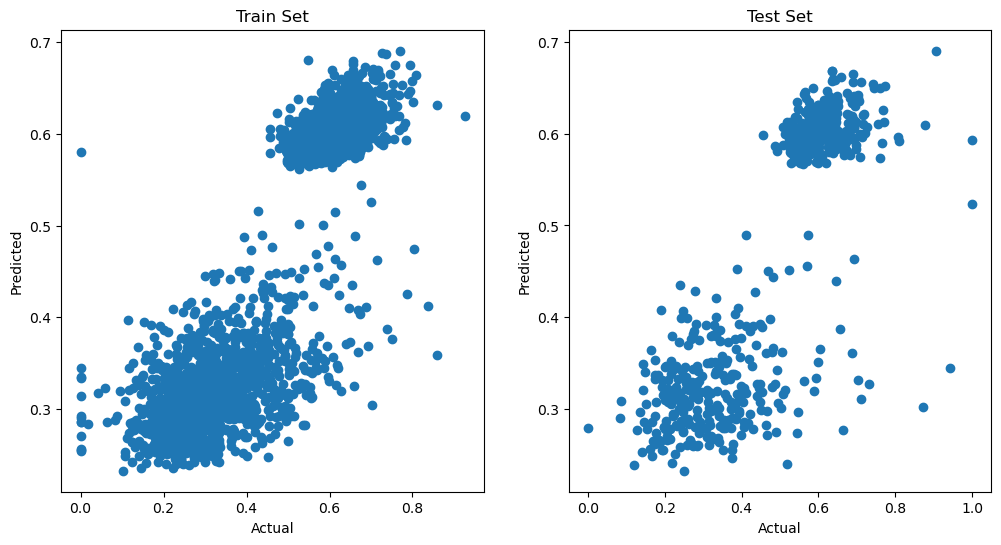

In [16]:
analyze_rnn_model(model, X_train, y_train, X_test, y_test)

In [17]:

history = model.fit(X_train, y_train, epochs=100, batch_size=30, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
39/39 - 1s - loss: 0.0082 - val_loss: 0.0102 - 824ms/epoch - 21ms/step
Epoch 2/100
39/39 - 1s - loss: 0.0081 - val_loss: 0.0103 - 799ms/epoch - 20ms/step
Epoch 3/100
39/39 - 1s - loss: 0.0082 - val_loss: 0.0107 - 789ms/epoch - 20ms/step
Epoch 4/100
39/39 - 1s - loss: 0.0081 - val_loss: 0.0110 - 805ms/epoch - 21ms/step
Epoch 5/100
39/39 - 1s - loss: 0.0082 - val_loss: 0.0103 - 763ms/epoch - 20ms/step
Epoch 6/100
39/39 - 1s - loss: 0.0083 - val_loss: 0.0113 - 822ms/epoch - 21ms/step
Epoch 7/100
39/39 - 1s - loss: 0.0081 - val_loss: 0.0105 - 787ms/epoch - 20ms/step
Epoch 8/100
39/39 - 1s - loss: 0.0081 - val_loss: 0.0104 - 770ms/epoch - 20ms/step
Epoch 9/100
39/39 - 1s - loss: 0.0082 - val_loss: 0.0105 - 725ms/epoch - 19ms/step
Epoch 10/100
39/39 - 1s - loss: 0.0082 - val_loss: 0.0104 - 671ms/epoch - 17ms/step
Epoch 11/100
39/39 - 1s - loss: 0.0080 - val_loss: 0.0107 - 586ms/epoch - 15ms/step
Epoch 12/100
39/39 - 1s - loss: 0.0080 - val_loss: 0.0105 - 795ms/epoch - 20ms/step
E

Epoch 99/100
39/39 - 1s - loss: 0.0059 - val_loss: 0.0109 - 783ms/epoch - 20ms/step
Epoch 100/100
39/39 - 1s - loss: 0.0060 - val_loss: 0.0116 - 774ms/epoch - 20ms/step


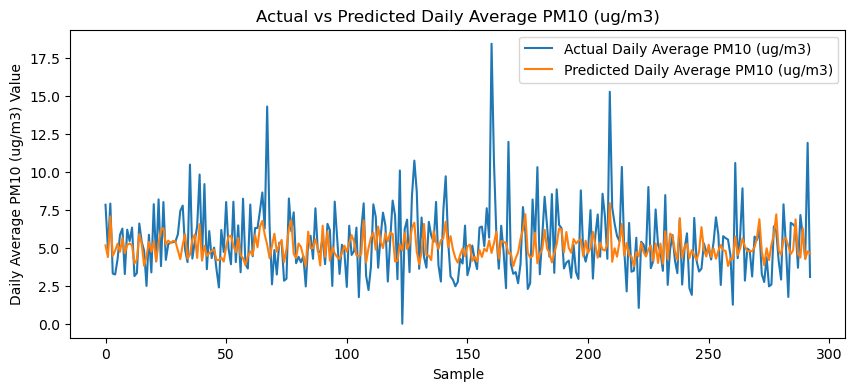

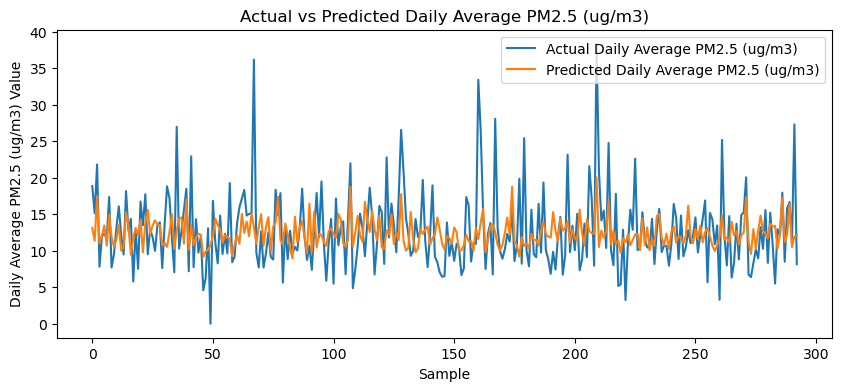

In [18]:
for i in range(2):
    plt.figure(figsize=(10, 4))
    plt.plot(y_test_inversed[:, i], label=f'Actual {target_labels[i]}')
    plt.plot(predictions_inversed[:, i], label=f'Predicted {target_labels[i]}')
    plt.title(f'Actual vs Predicted {target_labels[i]}')
    plt.ylabel(f'{target_labels[i]} Value')
    plt.xlabel('Sample')
    plt.legend()
    plt.show()

In [19]:
model.save('wellington_cnnlstm.h5') 

D:\Anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
print(wdf.head())


first_row = wdf.iloc[0]
print("第一行数据：")
print(first_row)

                  Date  Daily Average NO2 (ug/m3)  Daily Average O3 (ug/m3)  \
0  1577836800000000000                      5.891                 14.330667   
1  1577923200000000000                      3.420                 16.340000   
2  1578009600000000000                      2.755                 21.569625   
3  1578096000000000000                      8.181                 16.547500   
4  1578182400000000000                      3.747                 14.739042   

   Daily Average CO (mg/m3)  Daily Average PM2.5 (ug/m3)  \
0                     0.100                        7.025   
1                     0.090                        6.934   
2                     0.073                        4.839   
3                     0.167                       15.926   
4                     0.060                        5.798   

   Daily Average PM10 (ug/m3)  WDir(Deg)  WSpd(m/s)  GustDir(Deg)  \
0                      14.414       17.0        1.4         349.0   
1                      13.